In [317]:
match_url = 'https://www.sofascore.com/football/match/liverpool-ipswich-town/HsU#id:12436901'
# match_url = 'https://www.sofascore.com/football/match/river-plate-ca-independiente/jobslob#id:13292309'
# match_url = 'https://www.sofascore.com/football/match/atletico-madrid-real-madrid/EgbsLgb#id:12437775'

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager, PyPizza
import requests
import json
from bs4 import BeautifulSoup
from PIL import Image
import numpy as np
from urllib.request import urlopen
from urllib.error import HTTPError
pd.set_option('display.max_columns', None)
import re
import LanusStats as ls  
sofascore = ls.SofaScore()

In [319]:
URL1 = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL1)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)
URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)

#### Obtención de Datos del Partido

In [320]:
data_partido = sofascore.get_match_data(match_url)
data_partido = data_partido['event']
display(data_partido.keys())

dict_keys(['tournament', 'season', 'roundInfo', 'customId', 'status', 'winnerCode', 'attendance', 'venue', 'referee', 'homeTeam', 'awayTeam', 'homeScore', 'awayScore', 'time', 'changes', 'hasGlobalHighlights', 'hasXg', 'hasEventPlayerStatistics', 'hasEventPlayerHeatMap', 'detailId', 'crowdsourcingDataDisplayEnabled', 'id', 'defaultPeriodCount', 'defaultPeriodLength', 'defaultOvertimeLength', 'currentPeriodStartTimestamp', 'startTimestamp', 'slug', 'finalResultOnly', 'feedLocked', 'fanRatingEvent', 'seasonStatisticsType', 'showTotoPromo', 'isEditor'])

#### Equipos

In [321]:
nombre_equipo_local = data_partido['homeTeam']['name']
nombre_equipo_visitante = data_partido['awayTeam']['name']
print(f'{nombre_equipo_local} vs {nombre_equipo_visitante}')

Liverpool vs Ipswich Town


In [322]:
id_color_local = data_partido['homeTeam']['teamColors']['primary']
id_color_away = data_partido['awayTeam']['teamColors']['primary']
display(id_color_local)

'#cc0000'

##### Estadísticas Jugadores

In [323]:
estadisticas_jugadores = sofascore.get_players_match_stats(match_url)
estadisticas_jugadores_away = estadisticas_jugadores[1]
estadisticas_jugadores_local = estadisticas_jugadores[0]
display(estadisticas_jugadores_local.sample(2))
display(estadisticas_jugadores_away.sample(2))

,name,firstName,lastName,slug,shortName,position,jerseyNumber,height,userCount,id,country,marketValueCurrency,dateOfBirthTimestamp,proposedMarketValueRaw,fieldTranslations,shirtNumber,jerseyNumber,position,substitute,totalPass,accuratePass,totalLongBalls,accurateLongBalls,goalAssist,duelWon,wasFouled,savedShotsFromInsideTheBox,saves,minutesPlayed,touches,rating,possessionLostCtrl,ratingVersions,goalsPrevented,totalCross,accurateCross,aerialLost,duelLost,challengeLost,totalContest,wonContest,bigChanceCreated,shotOffTarget,hitWoodwork,interceptionWon,totalTackle,fouls,expectedGoals,keyPass,expectedAssists,aerialWon,totalClearance,onTargetScoringAttempt,dispossessed,blockedScoringAttempt,goals,captain,team
13,Darwin Núñez,,,darwin-nunez,D. Núñez,F,9,188,87502,924871,"{'alpha2': 'UY', 'alpha3': 'URY', 'name': 'Uru...",EUR,930182400,"{'value': 59000000, 'currency': 'EUR'}","{'nameTranslation': {'ar': 'داروين نونيز', 'hi...",9,9,F,True,8.0,7.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,22.0,12.0,6.6,2.0,"{'original': 6.6, 'alternative': None}",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool
1,Trent Alexander-Arnold,,,trent-alexander-arnold,T. Alexander-Arnold,D,66,180,101182,795064,"{'alpha2': 'EN', 'alpha3': 'ENG', 'name': 'Eng...",EUR,907718400,"{'value': 77000000, 'currency': 'EUR'}",{'nameTranslation': {'ar': 'ترنت ألكسندر-أرنول...,66,66,D,False,89.0,74.0,1.0,1.0,1.0,5.0,NaN,NaN,NaN,90.0,113.0,8.2,20.0,"{'original': 8.2, 'alternative': None}",NaN,5.0,1.0,2.0,4.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,0.1326,1.0,0.491270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool


,name,firstName,lastName,slug,shortName,position,jerseyNumber,height,userCount,id,country,marketValueCurrency,dateOfBirthTimestamp,proposedMarketValueRaw,fieldTranslations,shirtNumber,jerseyNumber,position,substitute,totalPass,accuratePass,totalLongBalls,accurateLongBalls,goalAssist,goodHighClaim,savedShotsFromInsideTheBox,saves,minutesPlayed,touches,rating,possessionLostCtrl,ratingVersions,goalsPrevented,duelLost,duelWon,challengeLost,totalContest,totalClearance,totalTackle,aerialLost,aerialWon,wasFouled,onTargetScoringAttempt,goals,outfielderBlock,expectedGoals,totalCross,interceptionWon,dispossessed,fouls,expectedAssists,wonContest,accurateCross,totalOffside,bigChanceCreated,keyPass,bigChanceMissed,captain,team
9,Jaden Philogene-Bidace,,,jaden-philogene-bidace,J. Philogene-Bidace,M,29,179,2400,1014461,"{'alpha2': 'EN', 'alpha3': 'ENG', 'name': 'Eng...",EUR,1013126400,"{'value': 14100000, 'currency': 'EUR'}",{'nameTranslation': {'ar': 'جادين فيلوجين-بيدا...,29,29,M,False,11.0,8.0,NaN,NaN,0.0,NaN,NaN,NaN,79.0,30.0,6.1,10.0,"{'original': 6.1, 'alternative': None}",NaN,8.0,6.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,3.0,3.0,NaN,0.011119,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Ipswich Town
6,Kalvin Phillips,NaN,NaN,kalvin-phillips,K. Phillips,M,8,177,6005,786028,"{'alpha2': 'EN', 'alpha3': 'ENG', 'name': 'Eng...",EUR,817862400,"{'value': 18800000, 'currency': 'EUR'}","{'nameTranslation': {'ar': 'كالفين فيليبس', 'h...",8,8,M,False,41.0,37.0,3.0,2.0,0.0,NaN,NaN,NaN,90.0,68.0,7.1,10.0,"{'original': 7.1, 'alternative': None}",NaN,6.0,5.0,1.0,2.0,4.0,3.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,6.0,1.0,1.0,0.011531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ipswich Town


#### Esqueleto del Grid

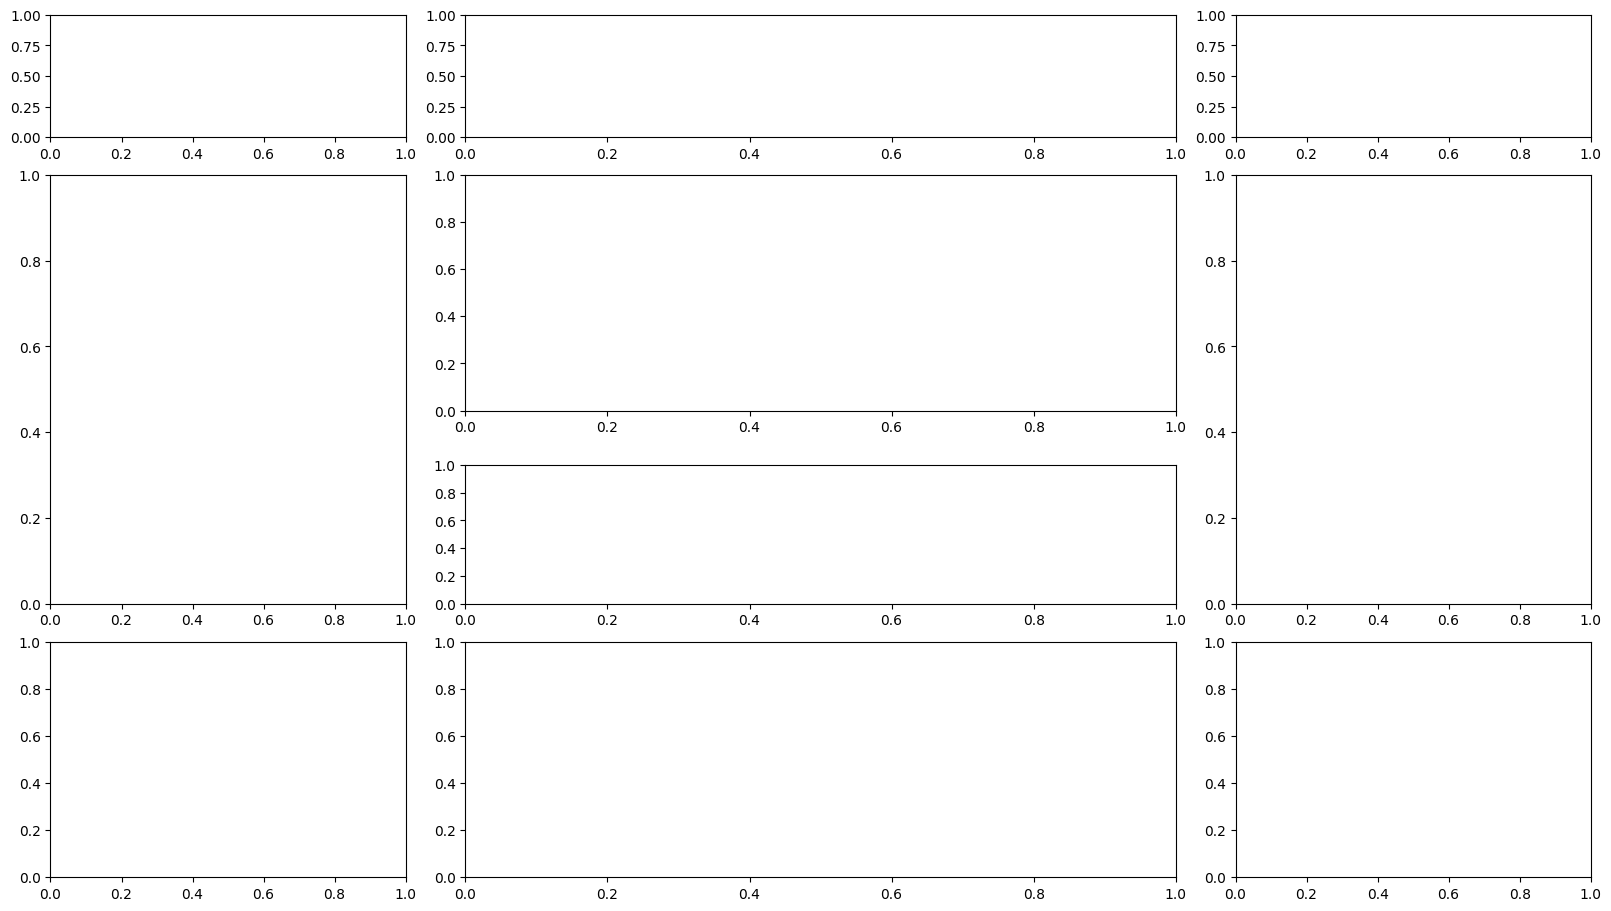

In [324]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
nrows = 6
ncols = 4
gs = fig.add_gridspec(nrows=10,ncols=4)
fig.set_facecolor('white')

# ax = {}
# a = 1
# Gráficos simétricos
# for row in range(nrows):
#     for col in range(ncols): 
#         ax[a] = fig.add_subplot(gs[row,col]);
#         ax[a].set_title(f'[{row},{col}]');
#         a = a + 1


ax1 = fig.add_subplot(gs[0:2,0])
# ax1.set_title('Title grid [0,0]')
# ax1.text(.5,.5,'Escudo Local')

ax2 = fig.add_subplot(gs[0:2,1:3])
# ax2.text(.5,.5,'MATCH stats')

ax3 = fig.add_subplot(gs[0:2,3])
# ax3.text(.5,.5,'Escudo Away')

ax4 = fig.add_subplot(gs[2:7,0])
# ax4.text(.5,.5,'AVG position Local')

ax5 = fig.add_subplot(gs[2:7,3])
# ax5.text(.5,.5,'AVG position Away')

ax6 = fig.add_subplot(gs[2:5,1:3])
# ax6.text(.5,.5,'MATCH stats')

ax7 = fig.add_subplot(gs[7:10,0])
# ax7.text(.5,.5,'SHOT MAP Local')

ax8 = fig.add_subplot(gs[7:10,3])
# ax8.text(.5,.5,'SHOT MAP Away')

ax9 = fig.add_subplot(gs[5:7,1:3])
# ax9.text(.5,.5,'MATCH MOMENTUM GRAPH')

ax10 = fig.add_subplot(gs[7:10,1:3])
# ax10.text(.5,.5,'FIGURA heatmap, foto y name')

# Relleno del Grid

#### Escudos

In [325]:
def sacar_spines(ax):
    ax.spines[['top','right','bottom','left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

id_local = data_partido['homeTeam']['id']
id_away = data_partido['awayTeam']['id']

escudo_local = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{id_local}/image'))
escudo_away = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{id_away}/image'))

ax1.imshow(escudo_local)
sacar_spines(ax1)
ax3.imshow(escudo_away)
sacar_spines(ax3)

#### Datos Generales

In [326]:
sacar_spines(ax2)
ax2.text(x = 0.52, y = 1, ha = 'center', va = 'center', s = f'{data_partido['tournament']['uniqueTournament']['name']}', fontproperties = catamaran.prop, fontsize = 15)
ax2.text(x = 0.52, y = 0.8, ha = 'center', va = 'center', s = f'{nombre_equipo_local} - {nombre_equipo_visitante}', fontproperties = catamaran.prop, fontsize = 20)
ax2.text(x = 0.52, y = 0.4, ha = 'center', va = 'center', s = f'{data_partido['homeScore']['current']} - {data_partido['awayScore']['current']}', fontproperties = robotto_regular.prop, fontsize = 50)
ax2.text(x = 0, y = 1, ha = 'left', va = 'center', s = f'{data_partido['homeTeam']['venue']['stadium']['name']}', fontproperties = robotto_regular.prop, fontsize = 13)

import datetime
timestamp = data_partido['startTimestamp'] 
date = datetime.datetime.utcfromtimestamp(timestamp).strftime('%d/%m/%Y %H:%M')
date

ax2.text(x = 1, y = 1, ha = 'right', va = 'center', s = f'{date}', fontproperties = robotto_regular.prop, fontsize = 13)

Text(1, 1, '25/01/2025 15:00')

#### AVG Positions

In [327]:
def filtrar_jugadores_top_11(posiciones, estadisticas):
    top_11 = estadisticas.sort_values(by='minutesPlayed', ascending=False).head(11)['name']
    return posiciones.loc[posiciones['name'].isin(top_11)].reset_index(drop=True)

def dibujar_equipo(ax, posiciones, color_equipo, color_contorno, color_numero):
    pitch = VerticalPitch(
        pitch_type='opta', axis=False, label=False, tick=False, goal_type='box', 
        linestyle='-', pitch_color='white', line_color='black', 
        stripe=True, stripe_color='#e9e7e7', corner_arcs=True
    )
    pitch.draw(ax=ax)
    pitch.scatter(posiciones.averageX, y=posiciones.averageY, ax=ax, 
                  color=color_equipo, s=600, edgecolor=color_contorno, alpha=0.8)
    
    # Agregar números de los jugadores
    for _, row in posiciones.iterrows():
        ax.text(x=row.averageY, y=row.averageX, s=f'{row.jerseyNumber}', 
                va='center', ha='center', color=color_numero)

# Configuración equipos
color_contorno = 'black'
color_numero_local = data_partido['homeTeam']['teamColors']['secondary']
color_numero_away = data_partido['awayTeam']['teamColors']['secondary']

# Filtrar jugadores
posiciones_local = filtrar_jugadores_top_11(sofascore.get_players_average_positions(match_url)[0], estadisticas_jugadores_local)
posiciones_away = filtrar_jugadores_top_11(sofascore.get_players_average_positions(match_url)[1], estadisticas_jugadores_away)
posiciones_local.fillna(0, inplace=True)
posiciones_away.fillna(0, inplace=True)

# Dibujar los equipos
dibujar_equipo(ax4, posiciones_local, id_color_local, color_contorno, color_numero_local)
dibujar_equipo(ax5, posiciones_away, id_color_away, color_contorno, color_numero_away)


#### Estadísticas Partido

In [328]:
import json

# Función optimizada con lambda
get_stats = lambda url: json.loads(sofascore.httpclient_request(f'api/v1/event/{sofascore.get_match_id(url)}/statistics'))

stats = get_stats(match_url)

# Arreglo de spines y líneas
sacar_spines(ax6)
ax6.axhline(y=0, color='black')
ax6.axhline(y=1, color='black')

# Estadísticas más relevantes
categorias = {'Ball possession', 'Expected goals', 'Fouls', 'Passes', 'Yellow cards'}
y = 0.9

# Extraigo solo las estadísticas relevantes y armo el texto
for stat in filter(lambda x: x['name'] in categorias, stats['statistics'][0]['groups'][0]['statisticsItems']):
    ax6.text(
        x=0.52, y=y, ha='center', va='center',
        s=f"{stat['home']} - {stat['name']} - {stat['away']}",
        fontproperties=robotto_regular.prop, fontsize=15
    )
    y -= 0.2


#### Match Momentum

In [329]:
match_momentum = sofascore.get_match_momentum(match_url)

match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visitante = match_momentum[match_momentum['value'] < 0]

ax9.bar(match_momentum_local.minute, match_momentum_local.value, color = f'{id_color_local}', label = f'{nombre_equipo_local}')
ax9.bar(match_momentum_visitante.minute, match_momentum_visitante.value, color = f'{id_color_away}', label = f'{nombre_equipo_visitante}')

#Agrego las líneas al final de cada tiempo
ax9.axvline(x = 45, color = 'black', linewidth= 2, linestyle= '--')
ax9.axvline(x = 90 , color = 'black', linewidth= 2, linestyle= '--')

sacar_spines(ax9)
ax9.spines['bottom'].set_visible(True)

ax9.xaxis.set_visible(True)
ax9.set_xticks(np.arange(0, 100, step=15))
ax9.set_xlim(0,90 + data_partido['time']['injuryTime2'])

ax9.set_title( 'Match Momentum',fontproperties = robotto_regular.prop, ha = 'center', fontsize = 11)

Text(0.5, 1.0, 'Match Momentum')

#### Shot Maps

In [330]:
def procesar_tiros_por_equipo(tiros, es_local):
    df = tiros[tiros['isHome'] == es_local][['name', 'x', 'y', 'shotType', 'time']]
    return df[df['shotType'] == 'goal'], df[df['shotType'] != 'goal']

def dibujar_tiros(ax, tiros_gol, tiros_no_gol, color_equipo):
    pitch = VerticalPitch(
        pitch_type='opta', label=False, tick=False, goal_type='box', 
        linestyle='-', pitch_color='white', line_color='black',
        stripe=True, stripe_color='#e9e7e7', corner_arcs=True,
        pad_top= -(125 - tiros.x.max()), pad_bottom=5
    )
    pitch.draw(ax=ax)
    
    # Graficar goles
    pitch.scatter(tiros_gol.x, tiros_gol.y, ax=ax, color=color_equipo, 
                  s=400, edgecolor='green', alpha=0.95, zorder=99)
    
    # Graficar tiros fallidos
    pitch.scatter(tiros_no_gol.x, tiros_no_gol.y, ax=ax, color=color_equipo, 
                  s=250, alpha=0.4, edgecolor=color_contorno, zorder=1)

    ax.invert_yaxis()
    ax.invert_xaxis()

# Obtener datos de tiros
tiros = sofascore.get_match_shotmap(match_url)

# Filtrar tiros por equipo
gol_local, no_gol_local = procesar_tiros_por_equipo(tiros, es_local=True)
gol_away, no_gol_away = procesar_tiros_por_equipo(tiros, es_local=False)

# Dibujar tiros
dibujar_tiros(ax7, gol_local, no_gol_local, id_color_local)
dibujar_tiros(ax8, gol_away, no_gol_away, id_color_away)



In [331]:
#Agrego los goles a los datos del partido

tiros_local = tiros[tiros['isHome'] == True][['name','x','y','shotType','time']]
tiros_away = tiros[tiros['isHome'] == False][['name','x','y','shotType','time']]
goles_local = tiros_local[tiros_local['shotType'] == 'goal']
goles_away = tiros_away[tiros_away['shotType'] == 'goal']
goles_local.reset_index(drop = True, inplace = True)
goles_away.reset_index(drop = True, inplace = True)

a = 0.1
for i in range(goles_local.shape[0]):
    ax2.text(x = 0.15, y = 0.4 + a, ha = 'left', va = 'center', s = f"{goles_local.time[i]}' {goles_local.name[i]}", fontproperties = robotto_regular.prop, fontsize = 13)
    a = a - 0.15

a = 0.1
for i in range(goles_away.shape[0]):
    ax2.text(x = 0.7, y = 0.4 + a, ha = 'left', va = 'center', s = f"{goles_away.time[i]}' {goles_away.name[i]}", fontproperties = robotto_regular.prop, fontsize = 13)
    a = a - 0.15


#### Figura del Partido

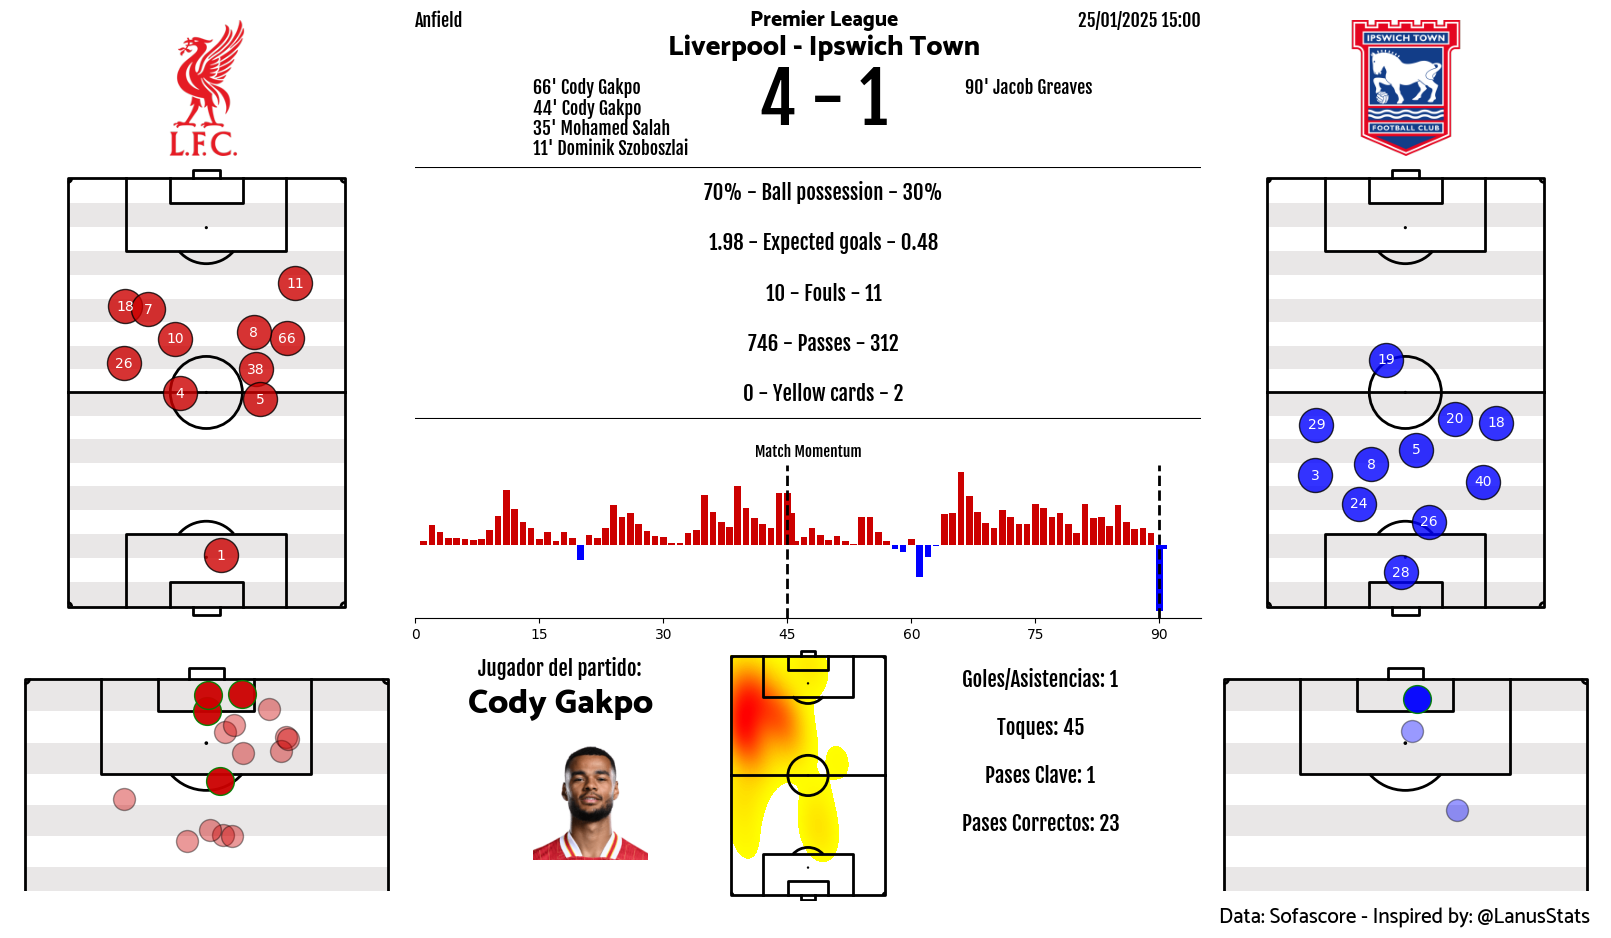

In [332]:

estadisticas_jugadores_local = sofascore.get_players_match_stats(match_url)[0]
estadisticas_jugadores_away = sofascore.get_players_match_stats(match_url)[1]

estadisticas_jugadores_local = estadisticas_jugadores_local.loc[:, ~estadisticas_jugadores_local.columns.duplicated()]
estadisticas_jugadores_away = estadisticas_jugadores_away.loc[:, ~estadisticas_jugadores_away.columns.duplicated()]


# Concatenar dataframes
estadisticas_jugadores_todos = pd.concat([estadisticas_jugadores_local, estadisticas_jugadores_away], ignore_index=True)

# Renombrar columnas
estadisticas_jugadores_todos.rename(columns={
    'name': 'Nombre', 'position': 'position', 'id': 'id', 'totalPass': 'Pases Totales',
    'accuratePass': 'Pases Correctos', 'duelWon': 'Duelos Ganados', 'saves': 'Atajadas',
    'touches': 'Toques', 'rating': 'rating', 'interceptionWon': 'Intercepciones',
    'keyPass': 'Pases Clave', 'goalAssist': 'Goles/Asistencias', 'bigChanceCreated': 'Grandes Chances Generadas',
    'team': 'team'
}, inplace=True)

# Obtener jugador del partido
columns_to_convert = ['Pases Totales', 'Pases Correctos', 'Duelos Ganados', 'Atajadas', 'Toques', 'rating',
                      'Intercepciones', 'Pases Clave', 'Goles/Asistencias', 'Grandes Chances Generadas']
jugador_del_partido = estadisticas_jugadores_todos.sort_values(by='rating', ascending=False).head(1).fillna(0)
jugador_del_partido[columns_to_convert] = jugador_del_partido[columns_to_convert].astype(int)

# Parámetros relevantes según la posición del jugador
params_dict = {
    'D': ['Goles/Asistencias', 'Duelos Ganados', 'Intercepciones', 'Pases Totales', 'Pases Correctos'],
    'G': ['Atajadas'],
    'M': ['Goles/Asistencias', 'Toques', 'Pases Correctos', 'Intercepciones', 'Duelos Ganados']
}
params = params_dict.get(jugador_del_partido['position'].values[0], ['Goles/Asistencias', 'Toques', 'Pases Clave', 'Pases Correctos'])

# Obtener valores de los parámetros
values = jugador_del_partido[params].values.flatten().tolist()

# Obtener mapa de calor del jugador
heat_map_location = sofascore.get_player_heatmap(match_url, player=jugador_del_partido['Nombre'].values[0])

# Dibujar el campo y el heatmap
pitch = VerticalPitch(pitch_type='opta', axis=False, label=False, tick=False, goal_type='box',
                      linestyle='-', pitch_color='white', line_color='black', stripe_color='#e9e7e7', corner_arcs=True)
pitch.draw(ax=ax10)
pitch.kdeplot(x=heat_map_location['x'], y=heat_map_location['y'], ax=ax10, levels=100,
              shade=True, zorder=-1, shade_lowest=False, cmap='autumn_r')

# Agregar estadísticas en el gráfico
for i, param in enumerate(params):
    ax10.text(x=-100, y=90 - i * 20, ha='center', va='center', s=f'{param}: {values[i]}',
              fontproperties=robotto_regular.prop, fontsize=15)

# Cargar imagen del jugador o escudo del equipo
id_jugador = jugador_del_partido['id'].values[0]
try:
    img_jugador = Image.open(urlopen(f'https://api.sofascore.app/api/v1/player/{id_jugador}/image'))
except HTTPError:
    img_jugador = escudo_local if jugador_del_partido['team'].values[0] == sofascore.get_team_names(match_url)[0] else escudo_away

ax10_image = add_image(img_jugador, fig, left=0.3, bottom=0.05, width=0.13, height=0.127)

# Agregar texto del jugador del partido
ax10.text(x=210, y=95, ha='center', va='center', s='Jugador del partido:', fontproperties=robotto_regular.prop, fontsize=15)
ax10.text(x=210, y=80, ha='center', va='center', s=jugador_del_partido['Nombre'].values[0], fontproperties=catamaran.prop, fontsize=25)

# Créditos
fig.text(0.99, -0.02, "Data: Sofascore - Inspired by: @LanusStats", size=15, fontproperties=catamaran2.prop, color="black", ha="right")

fig
